# Задание 3.

Загрузите [данные по изменению температуры поверхности земли](https://www.kaggle.com/datasets/berkeleyearth/climate-change-earth-surface-temperature-data). Для этого может понадобится зарегистрироваться на [Kaggle](https://kaggle.com). Затем нужно будет работать с данными, которые содержатся в файле **GlobalLandTemperaturesByMajorCity.csv**

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import zipfile

%matplotlib inline

with zipfile.ZipFile("archive.zip") as z:
    with z.open("GlobalLandTemperaturesByMajorCity.csv") as f:
        df = pd.read_csv(f, parse_dates=["dt"])

df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W


# Задание 3.1 (1 балл)

В последующих заданиях будут учитываться данные начиная с 01.01.1950. Для этого создайте новый `DataFrame`, в котором удалены все строки до 01.01.1950. Используйте созданный DataFrame в последующих заданиях.  

In [11]:
df1 = df[df.dt >= "01.01.1950"]
df1.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
1212,1950-01-01,26.773,0.239,Abidjan,Côte D'Ivoire,5.63N,3.23W
1213,1950-02-01,27.527,0.348,Abidjan,Côte D'Ivoire,5.63N,3.23W
1214,1950-03-01,28.344,0.431,Abidjan,Côte D'Ivoire,5.63N,3.23W
1215,1950-04-01,27.830,0.467,Abidjan,Côte D'Ivoire,5.63N,3.23W
1216,1950-05-01,26.896,0.248,Abidjan,Côte D'Ivoire,5.63N,3.23W


# Задание 3.2 (2 балла)

Постройте график среднегодовых температур в городе Торонто.

C:\Users\Egor\AppData\Local\Temp\ipykernel_4752\3041209851.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["year"] = df1["dt"].dt.year


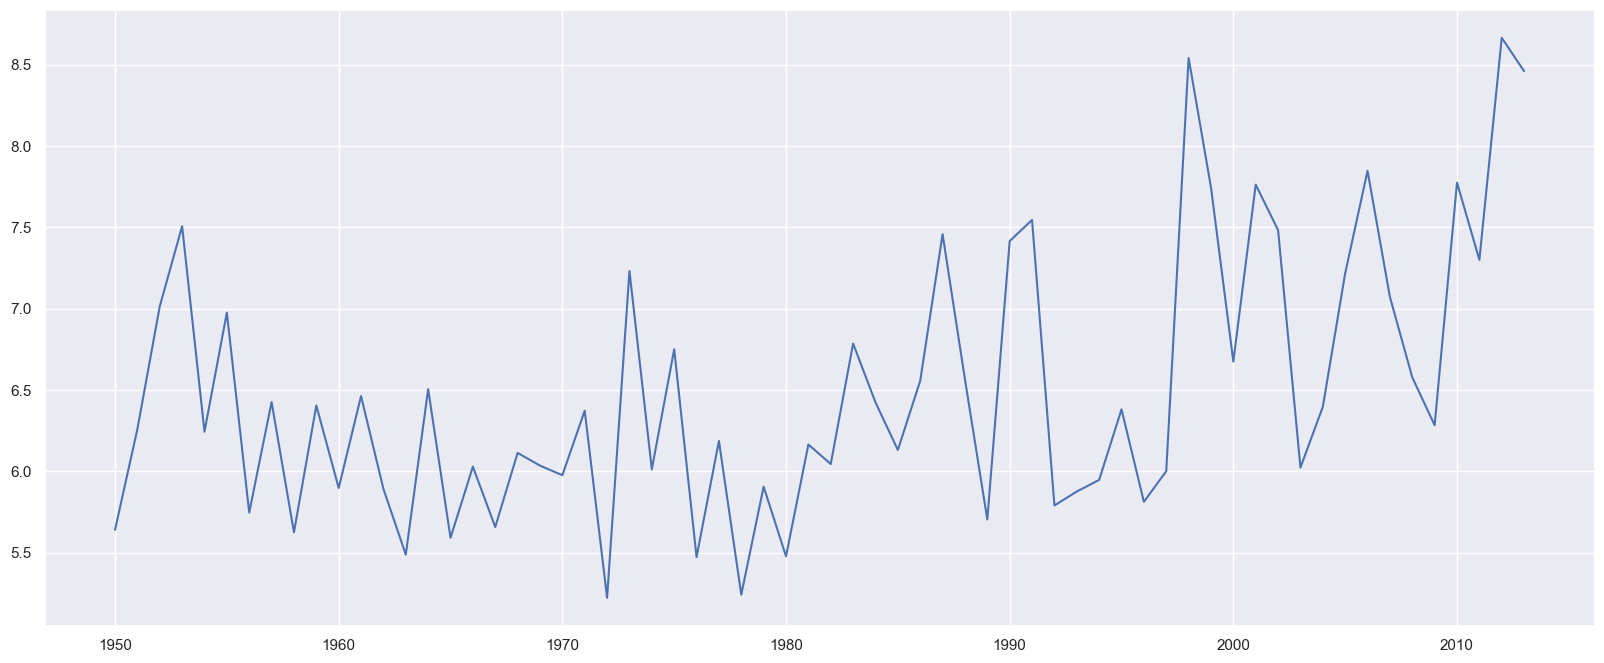

In [12]:
import seaborn as sns
sns.set_theme()


df1["year"] = df1["dt"].dt.year
group = df1[df1.City == "Toronto"].groupby('year').AverageTemperature.mean().reset_index()
group.head()
plt.plot(group.year, group.AverageTemperature)
plt.show()

# Задание 3.3 (2 балла)

Найдите город, для которого выборочная дисперсия температур на приведенных данных максимальна. 

In [13]:
group1 = df1.groupby('City').AverageTemperature.var().reset_index()
print(*group1[group1.AverageTemperature == max(group1.AverageTemperature)]["City"])

Harbin


# Задание 3.4 (4 балла)

На одной оси постройте графики, отображающие:
1. Зависимость выборочной дисперсии температур от широты города (Latitude).
2. Зависимость средней температуры в январе 1975 года от широты города (Latitude).
3. Зависимость средней температуры в июле 1975 года от широты города (Latitude).

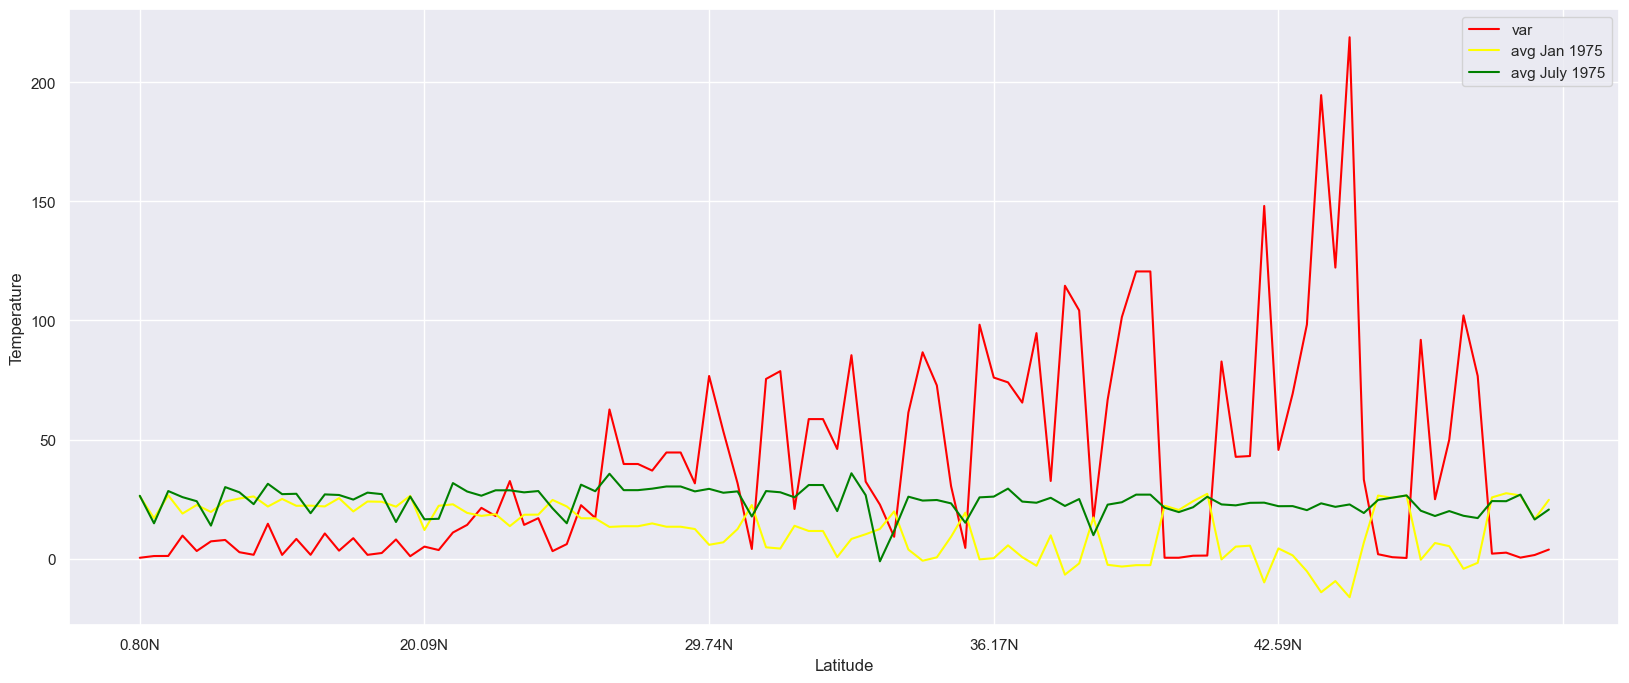

In [14]:
group2 = df1.groupby(['City', 'Latitude']).AverageTemperature.var().reset_index().sort_values('Latitude')
group3 = df1[(df1.dt.dt.year == 1975) & (df1.dt.dt.month == 1)].groupby(['City', 'Latitude']).AverageTemperature.mean().reset_index().sort_values('Latitude')
group4 = df1[(df1.dt.dt.year == 1975) & (df1.dt.dt.month == 7)].groupby(['City', 'Latitude']).AverageTemperature.mean().reset_index().sort_values('Latitude')

plt.rcParams['figure.figsize'] = (20, 8)
plt.rcParams['font.size'] = 16
ax = group2.plot(x='Latitude', y='AverageTemperature', label="var", color="red")
group3.plot(ax=ax, x='Latitude', y='AverageTemperature', label="avg Jan 1975", color="yellow")
group4.plot(ax=ax, x='Latitude', y='AverageTemperature', label="avg July 1975", color="green")

ax.set(xlabel="Latitude", ylabel="Temperature")
plt.show()


# Задание 3.5 (6 баллов)

Посчитайте данные по среднегодовой температуре в Санкт-Петербурге. Определите года, в которых средняя температура была выше, чем в предыдущем  и последующем году. Постройте график среднегодовой температуры и обозначьте на нём найденные года (произвольным образом). 

Постройте модель линейной регрессии (можно использовать [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)): $\mathbb{год} \rightarrow \mathbb{средняя\_температура}$. Отобразите прямую на предыдущем графике. 

1953, 1957, 1959, 1961, 1964, 1967, 1972, 1975, 1977, 1979, 1983, 1986, 1989, 1992, 1995, 1997, 2000, 2002, 2005, 2008, 2011


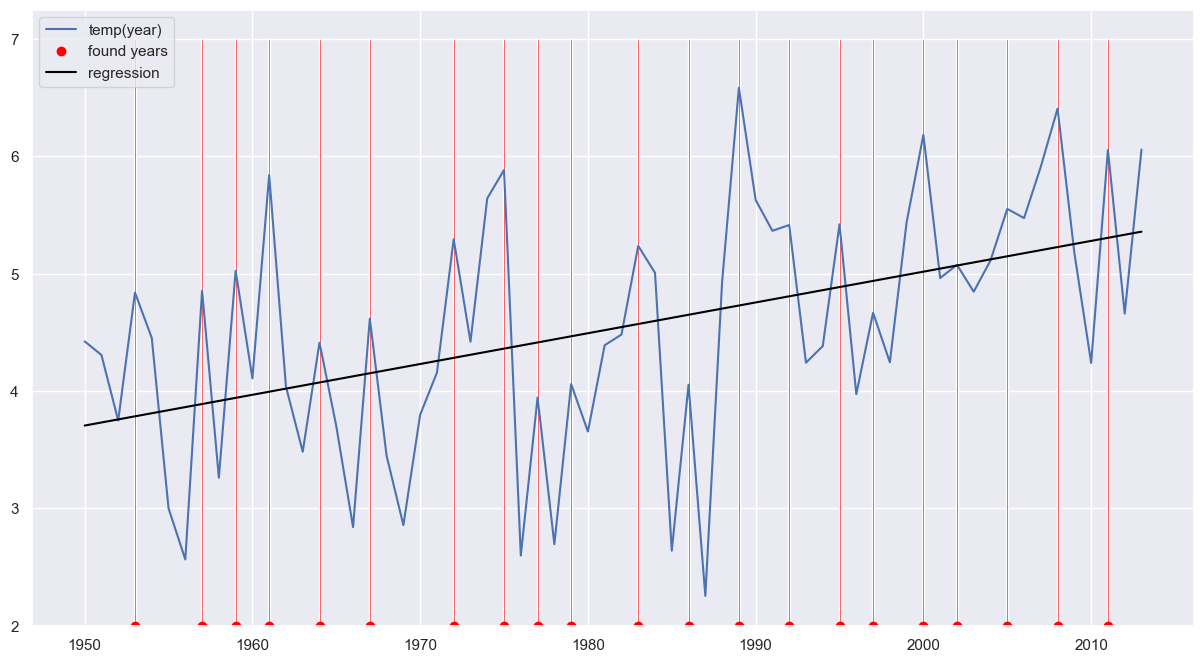

In [15]:
spb = df1[df1.City == 'Saint Petersburg']
gr = spb.groupby('year').AverageTemperature.mean().reset_index()
gr["delta_down"] = gr["AverageTemperature"] - gr["AverageTemperature"].shift(1)
gr["delta_up"] = gr["AverageTemperature"] - gr["AverageTemperature"].shift(-1)
years = gr[(gr.delta_down > 0) & (gr.delta_up > 0)].year
print(*years, sep=", ")

plt.rcParams['figure.figsize'] = (15, 8)
plt.plot(gr.year, gr.AverageTemperature, label="temp(year)")
plt.bar(years, 5, width=0.12, bottom=2, color="red") 
plt.plot(years, [2]*len(years), 'o', color="red", label="found years")


from sklearn.linear_model import LinearRegression
import numpy as np
lm = LinearRegression()
X = np.array(gr.year).reshape(-1, 1)
y = np.array(gr.AverageTemperature)
lm.fit(X,y)

plt.plot(gr.year, lm.predict(X), color="black", label="regression")
plt.legend()
plt.show()

# Задание 3.6 (4 балла)

Найдите города, для которых: 
1. Разница между максимальным и минимальным значением среднегодовой температуры в выборке максимальна.

In [16]:
city = df1.groupby(['City', 'year']).AverageTemperature.mean().reset_index()
max_t = city.groupby('City').AverageTemperature.max().reset_index()
min_t = city.groupby('City').AverageTemperature.min().reset_index()
max_t['diff'] = max_t.AverageTemperature - min_t.AverageTemperature
print(*max_t[max_t.AverageTemperature == max(max_t.AverageTemperature)].City)

Umm Durman


2. Самая большая средняя разница между средней температурой января и средней температурой июля.

In [17]:
jan = df1[df1.dt.dt.month == 1]
jul = df1[df1.dt.dt.month == 7]
jan["diff"] = abs(np.array(jan.AverageTemperature) - np.array(jul.AverageTemperature))
city = jan.groupby('City')["diff"].mean().reset_index()
print(*city[city["diff"] == city["diff"].max()].City)

Harbin


C:\Users\Egor\AppData\Local\Temp\ipykernel_4752\3324012768.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jan["diff"] = abs(np.array(jan.AverageTemperature) - np.array(jul.AverageTemperature))


3. Наибольшее среднее значение месяцев с отрицательной температурой в году.

In [18]:
neg = df1[df1.AverageTemperature < 0].groupby(['City', df1.dt.dt.year]).AverageTemperature.count().reset_index()
neg = neg.groupby('City').AverageTemperature.mean().reset_index().sort_values('AverageTemperature', ascending=False)
print(*neg.City[neg.AverageTemperature == max(neg.AverageTemperature)])
# neg = df1[df1.AverageTemperature < 0].groupby(['City', df1.dt.dt.year]).AverageTemperature.count().unstack(fill_value=0).stack().to_frame().reset_index()
# neg.rename(columns = {0:'t'}, inplace = True)
# neg = neg.groupby('City').t.mean().reset_index().sort_values('t', ascending=False)
# neg



Harbin


# Задание 3.7 (3 балла)

Отобразите города на карте, например с помощью [geopandas/folium](https://geopandas.org/en/stable/gallery/plotting_with_folium.html) или [plotly](https://plotly.com/python-api-reference/generated/plotly.express.scatter_geo.html). Причем цвет метки должен соответствовать средней температуре в январе за последние 10 лет. 

Text(0.5, 1.0, 'Cities')

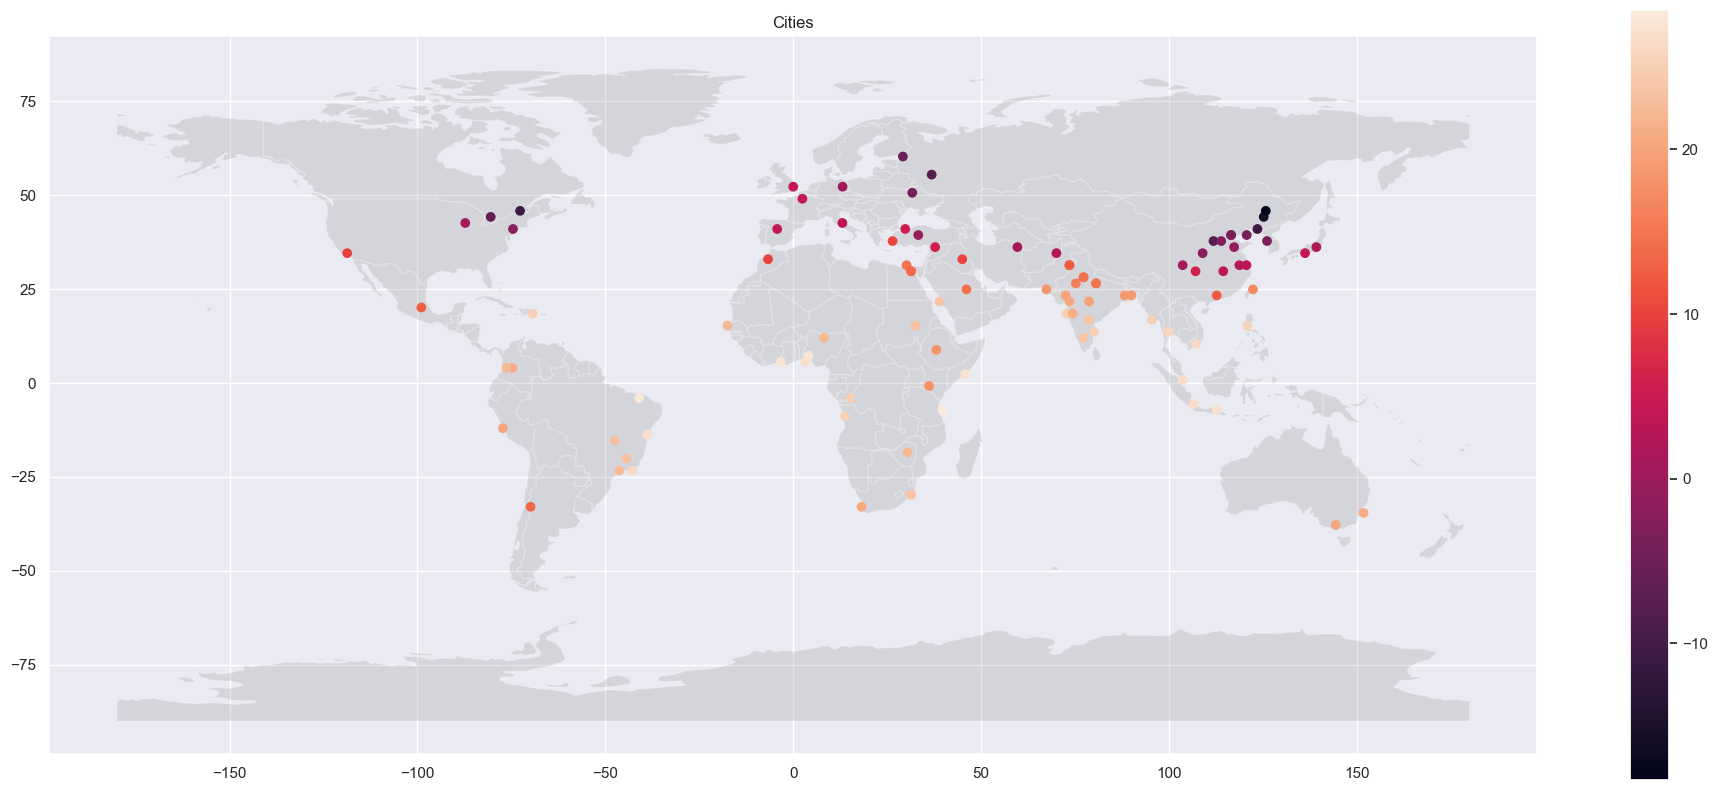

In [30]:
import geopandas as gpd
import matplotlib.colors as mcolors

def conversion(old: str) -> float:
    direction = {'N':1, 'S':-1, 'E': 1, 'W':-1}
    new_dir = direction[old[-1]]
    new = old[:-1]
    return float(new)*new_dir


geo_df = df1.copy()
geo_df["Latitude"] = geo_df["Latitude"].apply(conversion)
geo_df["Longitude"] = geo_df["Longitude"].apply(conversion)

last_10_years_in_jan = geo_df[(geo_df.dt >= "2003-09-01") & (geo_df.dt.dt.month == 1)].groupby(['City', 'Latitude', 'Longitude']).AverageTemperature.mean().reset_index()

world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

geo_df = gpd.GeoDataFrame(
    last_10_years_in_jan,
    geometry=gpd.points_from_xy(
        last_10_years_in_jan.Longitude,
        last_10_years_in_jan.Latitude
    )
)

fig, ax = plt.subplots(figsize=(24, 10))
world.plot(ax=ax, alpha=0.2, color="grey")
geo_df.plot(column="AverageTemperature", ax=ax, legend=True)
plt.title("Cities")


**\***(+3 балла). Вычислите прямую с "трендом" по изменению температуры в каждом городе в период 1950-2013 (можно с помощью линейной регрессии, как в задании **3.5**). Отобразите города цветом, который зависит от угла наклона этой прямой. 

In [20]:
from sklearn.linear_model import LinearRegression
import numpy as np

gr = df1.copy()
gr["Latitude"] = gr["Latitude"].apply(conversion)
gr["Longitude"] = gr["Longitude"].apply(conversion)
gr = gr.groupby(['City', 'Latitude', 'Longitude', 'year']).AverageTemperature.mean().reset_index()
def f(group: pd.DataFrme) -> float:
    lm = LinearRegression()
    X = np.array(group.year).reshape(-1, 1)
    y = np.array(group.AverageTemperature)
    lm.fit(X, y)
    return lm.coef_[0]
gr = gr.groupby(['City', 'Latitude', 'Longitude']).apply(f).reset_index()
gr.rename(columns={0:'coef'}, inplace=True)

geo_df = gpd.GeoDataFrame(
    gr,
    geometry=gpd.points_from_xy(
        gr.Longitude,
        gr.Latitude
    )
)

fig, ax = plt.subplots(figsize=(24, 10))
world.plot(ax=ax, alpha=0.2, color="grey")
geo_df.plot(column="coef", ax=ax, legend=True)
plt.title("Cities")

AttributeError: module 'pandas' has no attribute 'DataFrme'


**\***(+1 балл) Используйте библиотеку [pwlf](https://pypi.org/project/pwlf/) с фиксированным числом сегментов и угол наклона последнего сегмента. 

Text(0.5, 1.0, 'Cities')

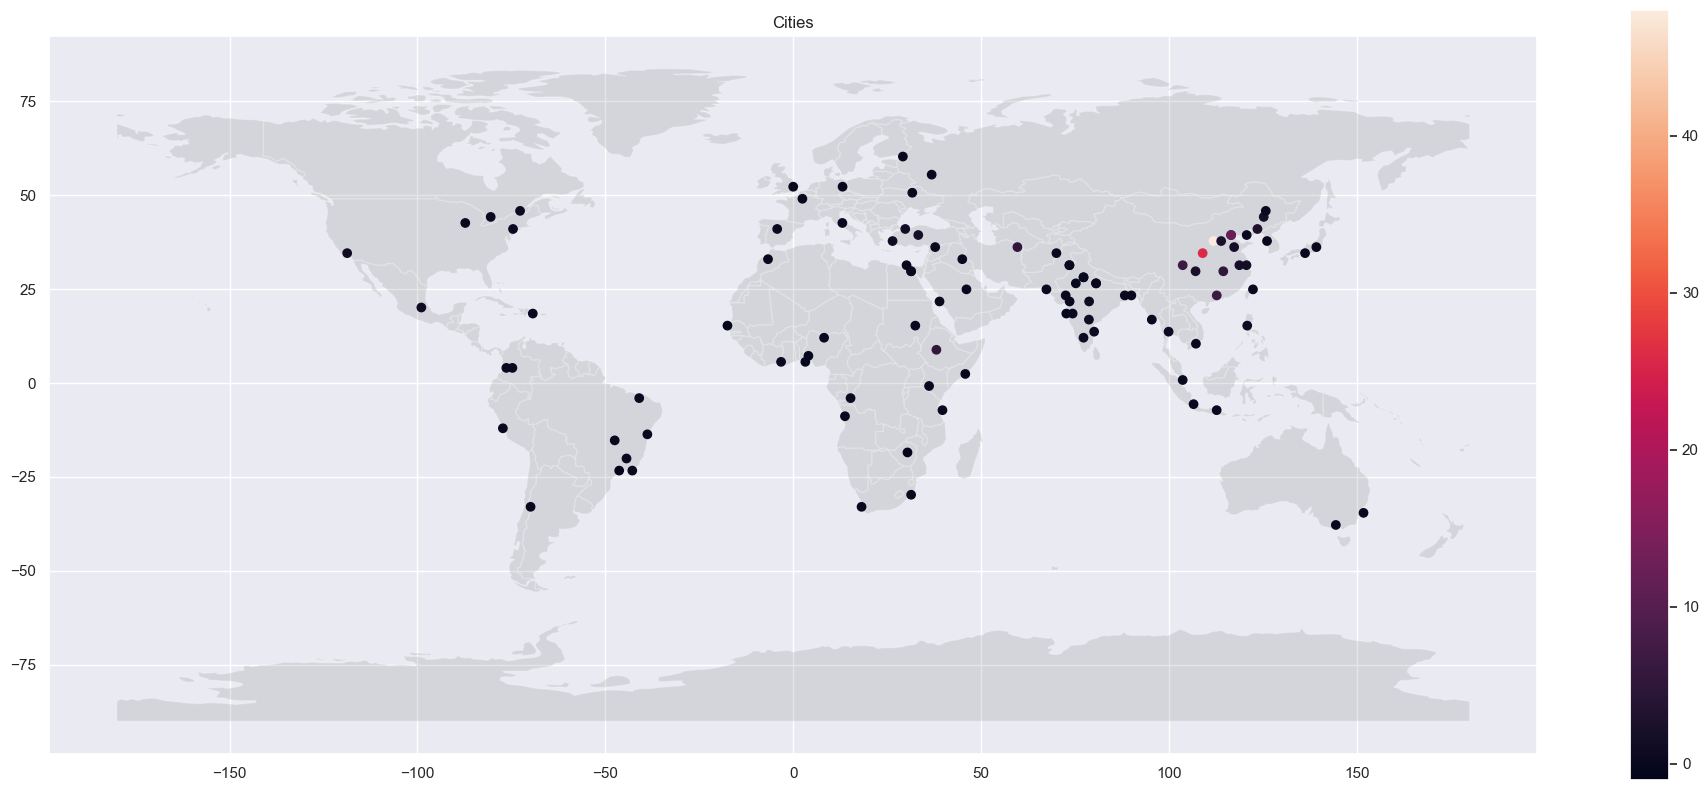

In [ ]:
import pwlf

gr = df1.copy()
gr["Latitude"] = gr["Latitude"].apply(conversion)
gr["Longitude"] = gr["Longitude"].apply(conversion)
gr = gr.groupby(['City', 'Latitude', 'Longitude', 'year']).AverageTemperature.mean().reset_index()
def f(group: pd.DataFrame) -> float:
    X = np.array(group.year)
    y = np.array(group.AverageTemperature)
    pwlf_lm = pwlf.PiecewiseLinFit(X, y)
    res = pwlf_lm.fit(4)
    return pwlf_lm.slopes[-1]

gr = gr.groupby(['City', 'Latitude', 'Longitude']).apply(f).reset_index()
gr.rename(columns={0:'coef'}, inplace=True)

geo_df = gpd.GeoDataFrame(
    gr,
    geometry=gpd.points_from_xy(
        gr.Longitude,
        gr.Latitude
    )
)

fig, ax = plt.subplots(figsize=(24, 10))
world.plot(ax=ax, alpha=0.2, color="grey")
geo_df.plot(column="coef", ax=ax, legend=True)
plt.title("Cities")

# *Задание 3.8 (8 баллов)

Цель - создать проект, который как минимум включает:
1. Использование юнит-тестов ([pytest](https://pytest.org)).
2. Применение средств форматирования и проверки исходного кода (например: [isort](https://pycqa.github.io/isort/), [black](https://black.readthedocs.io/en/stable/), [flake8](https://flake8.pycqa.org/en/latest/), [mypy](https://mypy.readthedocs.io/en/stable/)).
3. Спецификацию проекта в [pyproject.toml](https://pip.pypa.io/en/stable/reference/build-system/pyproject-toml/).
4. Использование утилит для работы с командной строкой ([argparse](https://docs.python.org/3/library/argparse.html), [click](https://click.palletsprojects.com/en/8.1.x/) и т.п.)
5. Сборку проекта в Wheel-файл.

Проект должен быть загружен в репозиторий. Функционал - произвольный, но должны использоваться данные из этого домашнего задания. Сам файл передается в качестве первого аргумента командной строки.  Например:

> python3 -m homeproject.app GlobalLandTemperaturesByMajorCity.csv 1980

Выдает самый жаркий месяц и город по наблюдениям за 1980 год.

*Ссылка на проект*

https://github.com/4eckah78/typical_python_project

Найдите пару городов, которые являются ближайшими соседями (по расстоянию) и у которых средняя температура января с 1970 по 1980 различается максимальным образом

In [185]:
from typing import Tuple

def conversion(old: str) -> float:
    direction = {'N':1, 'S':-1, 'E': 1, 'W':-1}
    new_dir = direction[old[-1]]
    new = old[:-1]
    return float(new)*new_dir

from math import radians, cos, sin, asin, sqrt

def count_dists(c1: str, c2: str) -> Tuple[float, float]:
    """
    Calculate the great circle distance in kilometers between two points 
    on the earth (specified in decimal degrees)
    """

    lat1 = gr[gr["City"] == c1].Latitude.values[0]
    lon1 = gr[gr["City"] == c1].Longitude.values[0]

    lat2 = gr[gr["City"] == c2].Latitude.values[0]
    lon2 = gr[gr["City"] == c2].Longitude.values[0]

    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371 # Radius of earth in kilometers. Use 3956 for miles. Determines return value units.

    temp1 = gr[gr["City"] == c1].AverageTemperature.values[0]
    temp2 = gr[gr["City"] == c2].AverageTemperature.values[0]

    return c * r, abs(temp1 - temp2)

gr = df1.copy()
gr["Latitude"] = gr["Latitude"].apply(conversion)
gr["Longitude"] = gr["Longitude"].apply(conversion)
gr = gr[(gr.dt.dt.year >=1970) & (gr.dt.dt.year <= 1980) & (gr.dt.dt.month == 1)].groupby(['City', 'Latitude', 'Longitude']).AverageTemperature.mean().reset_index()


from itertools import combinations

cities = gr['City'].unique()
dists = pd.DataFrame(columns=['city1', 'city2', 'dist', 'temp_diff'])

for city1, city2 in combinations(cities, 2):
    dist, temp_diff = count_dists(city1, city2)
    dists = dists.append({'city1': city1, 'city2': city2, 'dist': dist, 'temp_diff': temp_diff}, ignore_index=True)
dists

C:\Users\Egor\AppData\Local\Temp\ipykernel_4752\1777427867.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dists = dists.append({'city1': city1, 'city2': city2, 'dist': dist, 'temp_diff': temp_diff}, ignore_index=True)
C:\Users\Egor\AppData\Local\Temp\ipykernel_4752\1777427867.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dists = dists.append({'city1': city1, 'city2': city2, 'dist': dist, 'temp_diff': temp_diff}, ignore_index=True)
C:\Users\Egor\AppData\Local\Temp\ipykernel_4752\1777427867.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dists = dists.append({'city1': city1, 'city2': city2, 'dist': dist, 'temp_diff': temp_diff}, ignore_index=True)
C:\Users\Egor\AppData\Local\Temp\ipykernel_4752\1777427867.py

,city1,city2,dist,temp_diff
0,Abidjan,Addis Abeba,4571.868041,9.919455
1,Abidjan,Ahmadabad,8306.800073,7.468273
2,Abidjan,Aleppo,5380.947276,21.562545
3,Abidjan,Alexandria,4501.031287,12.710909
4,Abidjan,Ankara,5239.798465,28.622182
...,...,...,...,...
4945,Toronto,Wuhan,11653.886049,12.754727
4946,Toronto,Xian,11205.152618,6.562273
4947,Umm Durman,Wuhan,8412.173459,18.218636
4948,Umm Durman,Xian,7829.367607,24.411091


In [193]:
df = dists.copy()
df = df[df.dist <= 500]
df = df.sort_values('temp_diff', ascending=False)
df[df.temp_diff == df.temp_diff.max()]


,city1,city2,dist,temp_diff
2479,Faisalabad,Kabul,481.197724,10.711545
3416,Kabul,Lahore,481.197724,10.711545
